# Discussion 3: String, Group, Joining Operations in Pandas

We will continue discussion of [Pandas](https://pandas.pydata.org/). In this discussion, you will learn about:

* String operations
* Groupby 
* Joining DataFrames

You will not have enough time to do all of these problems in discussion and your TA will select a subset of the problems to complete. The rest are provided for your practice.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
import zipfile
from pathlib import Path
%matplotlib inline

import urllib.request
import os.path
import zipfile

#Download and unzip data for babynames
data_url = "https://www.ssa.gov/oact/babynames/state/namesbystate.zip"
local_filename = "babynamesbystate.zip"
if not os.path.exists(local_filename): # if the data exists don't download again
    with urllib.request.urlopen(data_url) as resp, open(local_filename, 'wb') as f:
        f.write(resp.read())

zf = zipfile.ZipFile(local_filename, 'r')

#create dataframe of babynames
ca_name = 'CA.TXT'
field_names = ['State', 'Sex', 'Year', 'Name', 'Count']
with zf.open(ca_name) as fh:
    babynames = pd.read_csv(fh, header=None, names=field_names)

babynames.head(5) #Gets first 5 entries of df

## Question 1


### Question 1a

Set `num_of_names_per_year` equal to a Series which counts the number of different names for each Year in California.  Use the `babynames` DataFrame created above. The index should be the year number and the value should be the number of names for that year. For example `num_of_names_per_year.loc[2007]` should be 7,250.

To count the number of instances of each unique value in a `Series`, we can use the `value_counts()` [method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html) as `df["col_name"].value_counts()`. 

*Note:* We are not computing the number of babies but instead the number of names (rows in the table) for each year.

In [ ]:
num_of_names_per_year = ...
num_of_names_per_year[:5]

As an experiment, see what happens if we just try to call `value_counts` on the original DataFrame.

In [ ]:
babynames.value_counts()

We can also plot the results using the .plot method of the Series class.

In [ ]:
num_of_names_per_year.sort_index().plot()
plt.ylabel("Number of Unique Names")
plt.xlabel("Year")
plt.title('Number of Babynames per Year')
plt.show()

### Question 1b
Count the number of different names for each sex in `CA`.

That is, set `num_of_names_per_sex` to be equal to a Series with two rows. One row corresponding to the number of different female names and one row corresponding to the number of different male names. 

In [ ]:
num_of_names_per_sex = ...
num_of_names_per_sex

## Question 2: Groupby

Let's now turn to using groupby from lecture 5.

**Note:** This [slide](https://docs.google.com/presentation/d/1HfdsSHXCJkUFUmVNTXjel3yx4_WYCfcpDwGi6zcVQEM/edit#slide=id.g477ed0f02e_0_390) provides a visual picture of how `groupby.agg` works if you'd like a reference.

## Questions 2a - 2c: Elections

Let's start by reading in the election dataset.

In [ ]:
elections = pd.read_csv("elections.csv")
elections.head(5)

As we did in class, we can groupby "Party" and then print out the subframes that result. This isn't something you'll do often, but just so you can see it in code, an example is given below for elections since 1980.

In [ ]:
for n, g in elections.query("Year >= 1980").groupby("Party"):
    print(f"Name: {n}") # by the way this is an "f string", a relatively new and great feature of Python
    display(g)

### Question 2a
Using `groupby.agg` or one of the shorthand methods (`groupby.min`, `groupby.first`, etc.), create a Series `best_result` that gives the highest percentage vote ever attained by each party. For example `best_result['Libertarian']` should return 3.3. The order of your Series does not matter.

In [ ]:
best_result = ...
best_result.head(5)

### Question 2b  
Again using `groupby.agg` or one of the its shorthand methods, create a DataFrame `last_result` that gives the result for a party in its most recent year of participation.

For example `last_result.query("Party == 'Whig'")` or `last_result.loc[['Whig']]` should return the data shown below. Note: In your DataFrame, Party should be the index, not a column.

|Party | Year | Candidate      | Popular Vote | Result | %         |
|------|------|----------------|--------------|--------|-----------|
|**Whig**  | 1852 | Winfield Scott | 1386942      | loss   | 44.056548 |

In [ ]:
last_result = ...

Next let's try using `groupby.filter`. As an example, the code below filters our DataFrame so that rows are only kept for parties that have ever won an election.

As a reminder of how filter works, see [this slide](https://docs.google.com/presentation/d/1HfdsSHXCJkUFUmVNTXjel3yx4_WYCfcpDwGi6zcVQEM/edit#slide=id.g5ff184b7f5_0_1230).

In [ ]:
def at_least_one_candidate_in_the_frame_has_won(frame):
    """Returns df with rows only kept for parties that have
    won at least one election
    """
    win_count = sum(frame["Result"] == 'win')
    return win_count > 0

winners_only = elections.groupby("Party").filter(at_least_one_candidate_in_the_frame_has_won)
winners_only.tail(10)

### Question 2c
Using `filter`, create a DataFrame `major_party_results_since_1988` that includes all election results starting in 1988, but show only a row if the Party it belongs to has earned at least 1% of the popular vote in ANY election since 1988.

For example, in 1988, you should not include the `New Alliance` candidate, since this party has not earned 1% of the vote since 1988. However, you should include the `Libertarian` candidate from 1988 despite only having 0.47 percent of the vote in 1988, because in 2016, the Libertarian candidate Gary Johnson had 3.3% of the vote.

In [ ]:
major_party_results_since_1988 = ...
major_party_results_since_1988.head(4)

## Questions 2d - 2e: Babynames

### Question 2d
Let's shift gears, and now find the total occurences of female baby names in California.

Create a Series `female_name_since_2000_count` which gives the total number of occurrences of each name for female babies born in California from the year 2000 or later. The index should be the name, and the value should be the total number of births. Your series should be ordered in decreasing order of count. For example, your first row should have index "Emily" and value 49605, because 49,605 Emilys have been born since the year 2000 in California.

In [ ]:
female_name_since_2000_count = ...

### Question 2e
Using `groupby`, create a Series listing all baby names from 2018 in decreasing order of popularity. The result should not be broken down by gender! If a name is used by both male and female babies, the number you provide should be the total across both genders.

**Note:** *In this question we are now computing the number of registered babies with a given name.* 

For example, `count_for_names_2018["Noah"]` should be the number 2567 because in 2018 there were 2567 Noahs born (12 female and 2555 male).

In [ ]:
count_for_names_2018 = ...

## Question 3: Grouping Multiple Columns

Create a dataframe `major_party_results_avg` that transforms the dataframe `winners_only` to output the dataframe below.  The dataframe should have the index `Party`, and should have columns which depict the mean percentage that the party has lost or won across all elections.

Recall that the arguments to `pd.pivot_table` are as follows: `data` is the input dataframe, `index` includes the values we use as rows, `columns` are the columns of the pivot table, `values` are the values in the pivot table, and `aggfunc` is the aggregation function that we use to aggregate `values`.

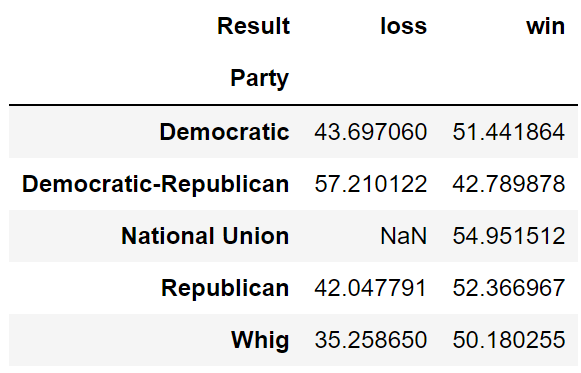

In [ ]:
major_party_results_avg = ...
major_party_results_avg

### Question 3b
Consider the output of the `groupby.sum()` call below. Note that the resulting DataFrame is multi-indexed.  This dataframe below gives us the count of the number of occurences per year.

In [ ]:
name_counts_since_1940 = babynames[babynames["Year"] >= 1940].groupby(["Name", "Year"]).sum()
name_counts_since_1940.head(9)

Multi-indexed DataFrames can be a little confusing at first, but the ideas for using loc generalize pretty naturally. Examples below:

In [ ]:
name_counts_since_1940.loc['Aahna':'Aairah']

In [ ]:
#Use both indices
name_counts_since_1940.loc[("Aahna", 2008):("Aaiden", 2014)]

Using `name_counts_since_1940`, set `imani_2013_count` equal to the number of babies born with the name 'Imani' in the year 2013. You may use either `.loc`. or `.query`. Make sure you're returning a value and not a Series or DataFrame

In [ ]:
#name_counts_since_1940.query("Year == 2013 and Name == 'Imani'").iloc[0, 0]
imani_2013_count = ...

Note: Sometimes it's just useful to throw away the index and go back to having arbitrary numbers as an index. To do this, we use `reset_index()`.

In [ ]:
name_counts_since_1940_numerical_index = name_counts_since_1940.reset_index()
name_counts_since_1940_numerical_index.head(10)

## Question 4: String Operations and Table Joining

Create a new DataFrame called `elections_with_first_name` with a new column `First Name` that is equal to the Candidate's first name.

Hint: Use `.str.split`.

In [ ]:
elections_with_first_name = ...

Now create `elections_and_names` by joining the `elections_with_first_name` table with `name_counts_since_1940_numerical_index` on the first names of each person.

In [ ]:
elections_and_names = ...

Below we make a crude plot of election winners and losers. According to this plot, since the 1970s, we haven't had a president with a name that was highly common in the year he was elected. 

Note that our data is a bit messy since, for example, Bill Clinton's name in the data set is "Bill", when in fact his legal name is William.

In [ ]:
elections_and_names.query("Result == 'win'").set_index("Year")["Count"].plot()
elections_and_names.query("Result == 'loss'").sort_values("%").groupby("Year")['Count'].last().plot()
plt.title('Election Candidate Name Popularity')
plt.ylabel('Name Count')
plt.legend(["Winner", "Loser"])
plt.show()